In [2]:
from typing import Union
import random
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import numpy as np
from sklearn.metrics import mean_squared_error

In [3]:
def load_dataset(file_path: str) -> Union[pd.DataFrame, None]:
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except pd.errors.ParserError:
        print(f"Error: Unable to parse file '{file_path}'. Please check the file format.")
        return None

    return df

In [4]:
def convert(word):
    return ''.join(x.capitalize() or '_' for x in word.split('_'))

In [5]:
def statistical_measure(data_column_1: pd.DataFrame , data_column_2: pd.DataFrame):
    correlation_pearson, _ = pearsonr(data_column_1.values, data_column_2.values)
    correlation_spearman, _ = spearmanr(data_column_1.values, data_column_2.values)

    mse = mean_squared_error(data_column_1.values, data_column_2.values)

    relative_difference = np.mean(np.abs(data_column_1.values - data_column_2.values) / np.mean([data_column_1.values, data_column_2.values]) * 100)

    return correlation_pearson, correlation_spearman, mse, relative_difference

def extend_legend(ax, df_1, df_2, data_column):
    min_length = min(len(df_1), len(df_2))

    df_1 = df_1.iloc[:min_length, :]
    df_2 = df_2.iloc[:min_length, :]
    df_1_desc = df_1[data_column].describe()
    df_2_desc = df_2[data_column].describe()

    correlation_pearson, correlation_spearman, mse, relative_difference = statistical_measure(df_1[data_column], df_2[data_column])
    ax.plot([], [], ' ', label=f"Correlation Pearson: {round(correlation_pearson, 3)}")
    ax.plot([], [], ' ', label=f"Correlation Spearman: {round(correlation_spearman, 3)}")
    ax.plot([], [], ' ', label=f"MSE: {round(mse, 3)}")
    ax.plot([], [], ' ', label=f"Relative Difference: {round(relative_difference, 3)}")

    ax.plot([], [], ' ', label=f"Mean Cpp: {round(df_1_desc['mean'],3)}")
    ax.plot([], [], ' ', label=f"Std Cpp: {round(df_1_desc['std'],3)}")
    ax.plot([], [], ' ', label=f"Min Cpp: {round(df_1_desc['min'],3)}")
    ax.plot([], [], ' ', label=f"Max Cpp: {round(df_1_desc['max'],3)}")

    ax.plot([], [], ' ', label=f"Mean Python: {round(df_2_desc['mean'],3)}")
    ax.plot([], [], ' ', label=f"Std Python: {round(df_2_desc['std'],3)}")
    ax.plot([], [], ' ', label=f"Min Python: {round(df_2_desc['min'],3)}")
    ax.plot([], [], ' ', label=f"Max Python: {round(df_2_desc['max'],3)}") 

In [6]:
blue_palette = ['#00008B']
warm_palette = ['#ee092d']

def plot_dataframe(ax, file_path: str, data_column, label: str=None):
    df = load_dataset(file_path)[['simulation_time', data_column]]

    row = df[df['simulation_time']>=10].index.tolist()
    if row != []:
        df = df.iloc[:row[0]-1] 

    min_value = df[data_column].min()
    df[data_column] -= min_value

    color = blue_palette if 'cpp' in label else warm_palette
    ax.plot(df.iloc[:, 0], df.iloc[:, 1], label=label, color=random.choice(color))
    
    return df

def plot_dataframe_dataload(ax, file_path: str,  data_colum: str, label: str=None, shift=False):
    df = load_dataset(file_path)[['simulation_time', data_colum]]

    row = df[df[data_colum]>0].index.tolist()
    if row != []:
        df = df.iloc[row[0]-1:] 

    if shift:
        min_value = df['simulation_time'].min()
        df['simulation_time'] -= min_value

    row = df[df['simulation_time']>=10].index.tolist()
    if row != []:
        df = df.iloc[:row[0]-1] 

    color = blue_palette if 'cpp' in label else warm_palette
    ax.plot(df.loc[:, 'simulation_time'], df.loc[:, data_colum], label=label, color=random.choice(color))

    return df

In [ ]:
fig1, axs1 = plt.subplots(6,2, figsize=(25, 40))

paths = ["express" , "with_visualization"]
data_columns = ["real_time"]
python_list = [1,2,3]
python_list_sensor = [0,4,5]
cpp_list = [7,8,9]
cpp_list_sensor = [10,11,12]

assert len(python_list) == len(cpp_list), "Make sure you have the same amount of data for both"
assert len(python_list_sensor) == len(cpp_list_sensor), "Make sure you have the same amount of data for both"

for idx_path, path in enumerate(paths):
    for idx_data_column, data_column in enumerate(data_columns):
        for i in range(len(python_list)):
            index = i + len(python_list)*idx_path + len(python_list)*len(data_columns)*idx_data_column
            file_path_1 = f"./exemplary_simulation_results/{path}/simulation_real_time_python_{path}_ZigZagProtocolMobile_{python_list[i]}.csv"
            df_1 = plot_dataframe(axs1[index][0], file_path=file_path_1, data_column=data_column, label=f"ZigZagProtocolMobile_python_{python_list[i]}")
            
            file_path_2 = f"./exemplary_simulation_results/{path}/simulation_real_time_cpp_{path}_ZigZagProtocolMobile_{cpp_list[i]}.csv"
            df_2 = plot_dataframe(axs1[index][0], file_path=file_path_2, data_column=data_column, label=f"ZigZagProtocolMobile_cpp_{cpp_list[i]}")

            extend_legend(axs1[index][0], df_1, df_2, data_column)

        for i in range(len(python_list_sensor)):
            index = i + len(python_list_sensor)*idx_path + len(python_list_sensor)*len(data_columns)*idx_data_column
            file_path_1 = f"./exemplary_simulation_results/{path}/simulation_real_time_python_{path}_ZigZagProtocolSensor_{python_list_sensor[i]}.csv"
            df_1 = plot_dataframe(axs1[index][1], file_path=file_path_1, data_column=data_column, label=f"ZigZagProtocolSensor_python_{python_list_sensor[i]}")

            file_path_2 = f"./exemplary_simulation_results/{path}/simulation_real_time_cpp_{path}_ZigZagProtocolSensor_{cpp_list_sensor[i]}.csv"
            df_2 = plot_dataframe(axs1[index][1], file_path=file_path_2, data_column=data_column, label=f"ZigZagProtocolSensor_cpp_{cpp_list_sensor[i]}")

            extend_legend(axs1[index][1], df_1, df_2, data_column)

        for i in range(len(python_list)):
            index = i + len(python_list)*idx_path + len(python_list)*len(data_columns)*idx_data_column
            axs1[index][0].legend()
            axs1[index][0].set_xlabel('Simulation Time')
            axs1[index][0].set_ylabel(convert(data_column))
            axs1[index][0].set_title(f'Simulation Time vs. {convert(data_column)} - {convert(path)} for Python {python_list[i]} and CPP {cpp_list[i]} - Mobile')

        for i in range(len(python_list_sensor)):   
            index = i + len(python_list)*idx_path + len(python_list)*len(data_columns)*idx_data_column
            axs1[index][1].legend()
            axs1[index][1].set_xlabel('Simulation Time')
            axs1[index][1].set_ylabel(convert(data_column))
            axs1[index][1].set_title(f'Simulation Time vs. {convert(data_column)} - {convert(path)} for Python {python_list_sensor[i]} and CPP {cpp_list_sensor[i]} - Sensor')


In [ ]:
fig2, axs2 = plt.subplots(12,2, figsize=(20, 80))

paths = ["express" , "with_visualization"]
data_columns = ["current_data_load", "stable_data_load"]
python_list = [1,2,3]
cpp_list = [7,8,9]

# Unshifted and shifted
for idx_path, path in enumerate(paths):
    for idx_data_column, data_column in enumerate(data_columns):
        for idx, i in enumerate(python_list):
            index = idx + len(python_list)*idx_path + len(python_list)*len(data_columns)*idx_data_column
            file_path = f"./exemplary_simulation_results/{path}/tracked_variables_python_{path}_ZigZagProtocolMobile_{i}.csv"
            df_1 = plot_dataframe_dataload(axs2[index][0], file_path=file_path, data_colum=data_column, label=f"ZigZagProtocolMobile_python_{i}")
            df_2 = plot_dataframe_dataload(axs2[index][1], file_path=file_path, data_colum=data_column, label=f"ZigZagProtocolMobile_python_{i}", shift=True)

            extend_legend(axs2[index][0], df_1, df_2, data_column)

        for idx, i in enumerate(cpp_list):
            index = idx + len(python_list)*idx_path + len(python_list)*len(data_columns)*idx_data_column
            file_path = f"./exemplary_simulation_results/{path}/tracked_variables_cpp_{path}_ZigZagProtocolMobile_{i}.csv"
            df_1 = plot_dataframe_dataload(axs2[index][0], file_path=file_path, data_colum=data_column, label=f"ZigZagProtocolMobile_cpp_{i}")
            df_2 = plot_dataframe_dataload(axs2[index][1], file_path=file_path, data_colum=data_column, label=f"ZigZagProtocolMobile_cpp_{i}", shift=True)

            extend_legend(axs2[index][1], df_1, df_2, data_column)

        for i in range(3):
            index = i + len(python_list)*idx_path + len(python_list)*len(data_columns)*idx_data_column
            axs2[index][0].legend()
            axs2[index][0].set_xlabel('Simulation Time')
            axs2[index][0].set_ylabel({convert(data_column)})
            axs2[index][0].set_title(f'Simulation Time vs. {convert(data_column)} - {convert(path)} for Python {python_list[i]} and CPP {cpp_list[i]}')

            axs2[index][1].legend()
            axs2[index][1].set_xlabel('Simulation Time')
            axs2[index][1].set_ylabel({convert(data_column)})
            axs2[index][1].set_title(f'Simulation Time vs. {convert(data_column)} - {convert(path)} for Python {python_list[i]} and CPP {cpp_list[i]} - Shifted')


In [ ]:
# Startup times
# Omnet: 10,46s 
# Python: 4,31s

In [ ]:
elems = []
for i in range(26,49):
    elems.append(i)

print(elems)

Error: File './exemplary_simulation_results/with_visualization/cpp/25/simulation_real_time_cpp_with_visualization_25_ZigZagProtocolMobile_7.csv' not found.


TypeError: 'NoneType' object is not subscriptable

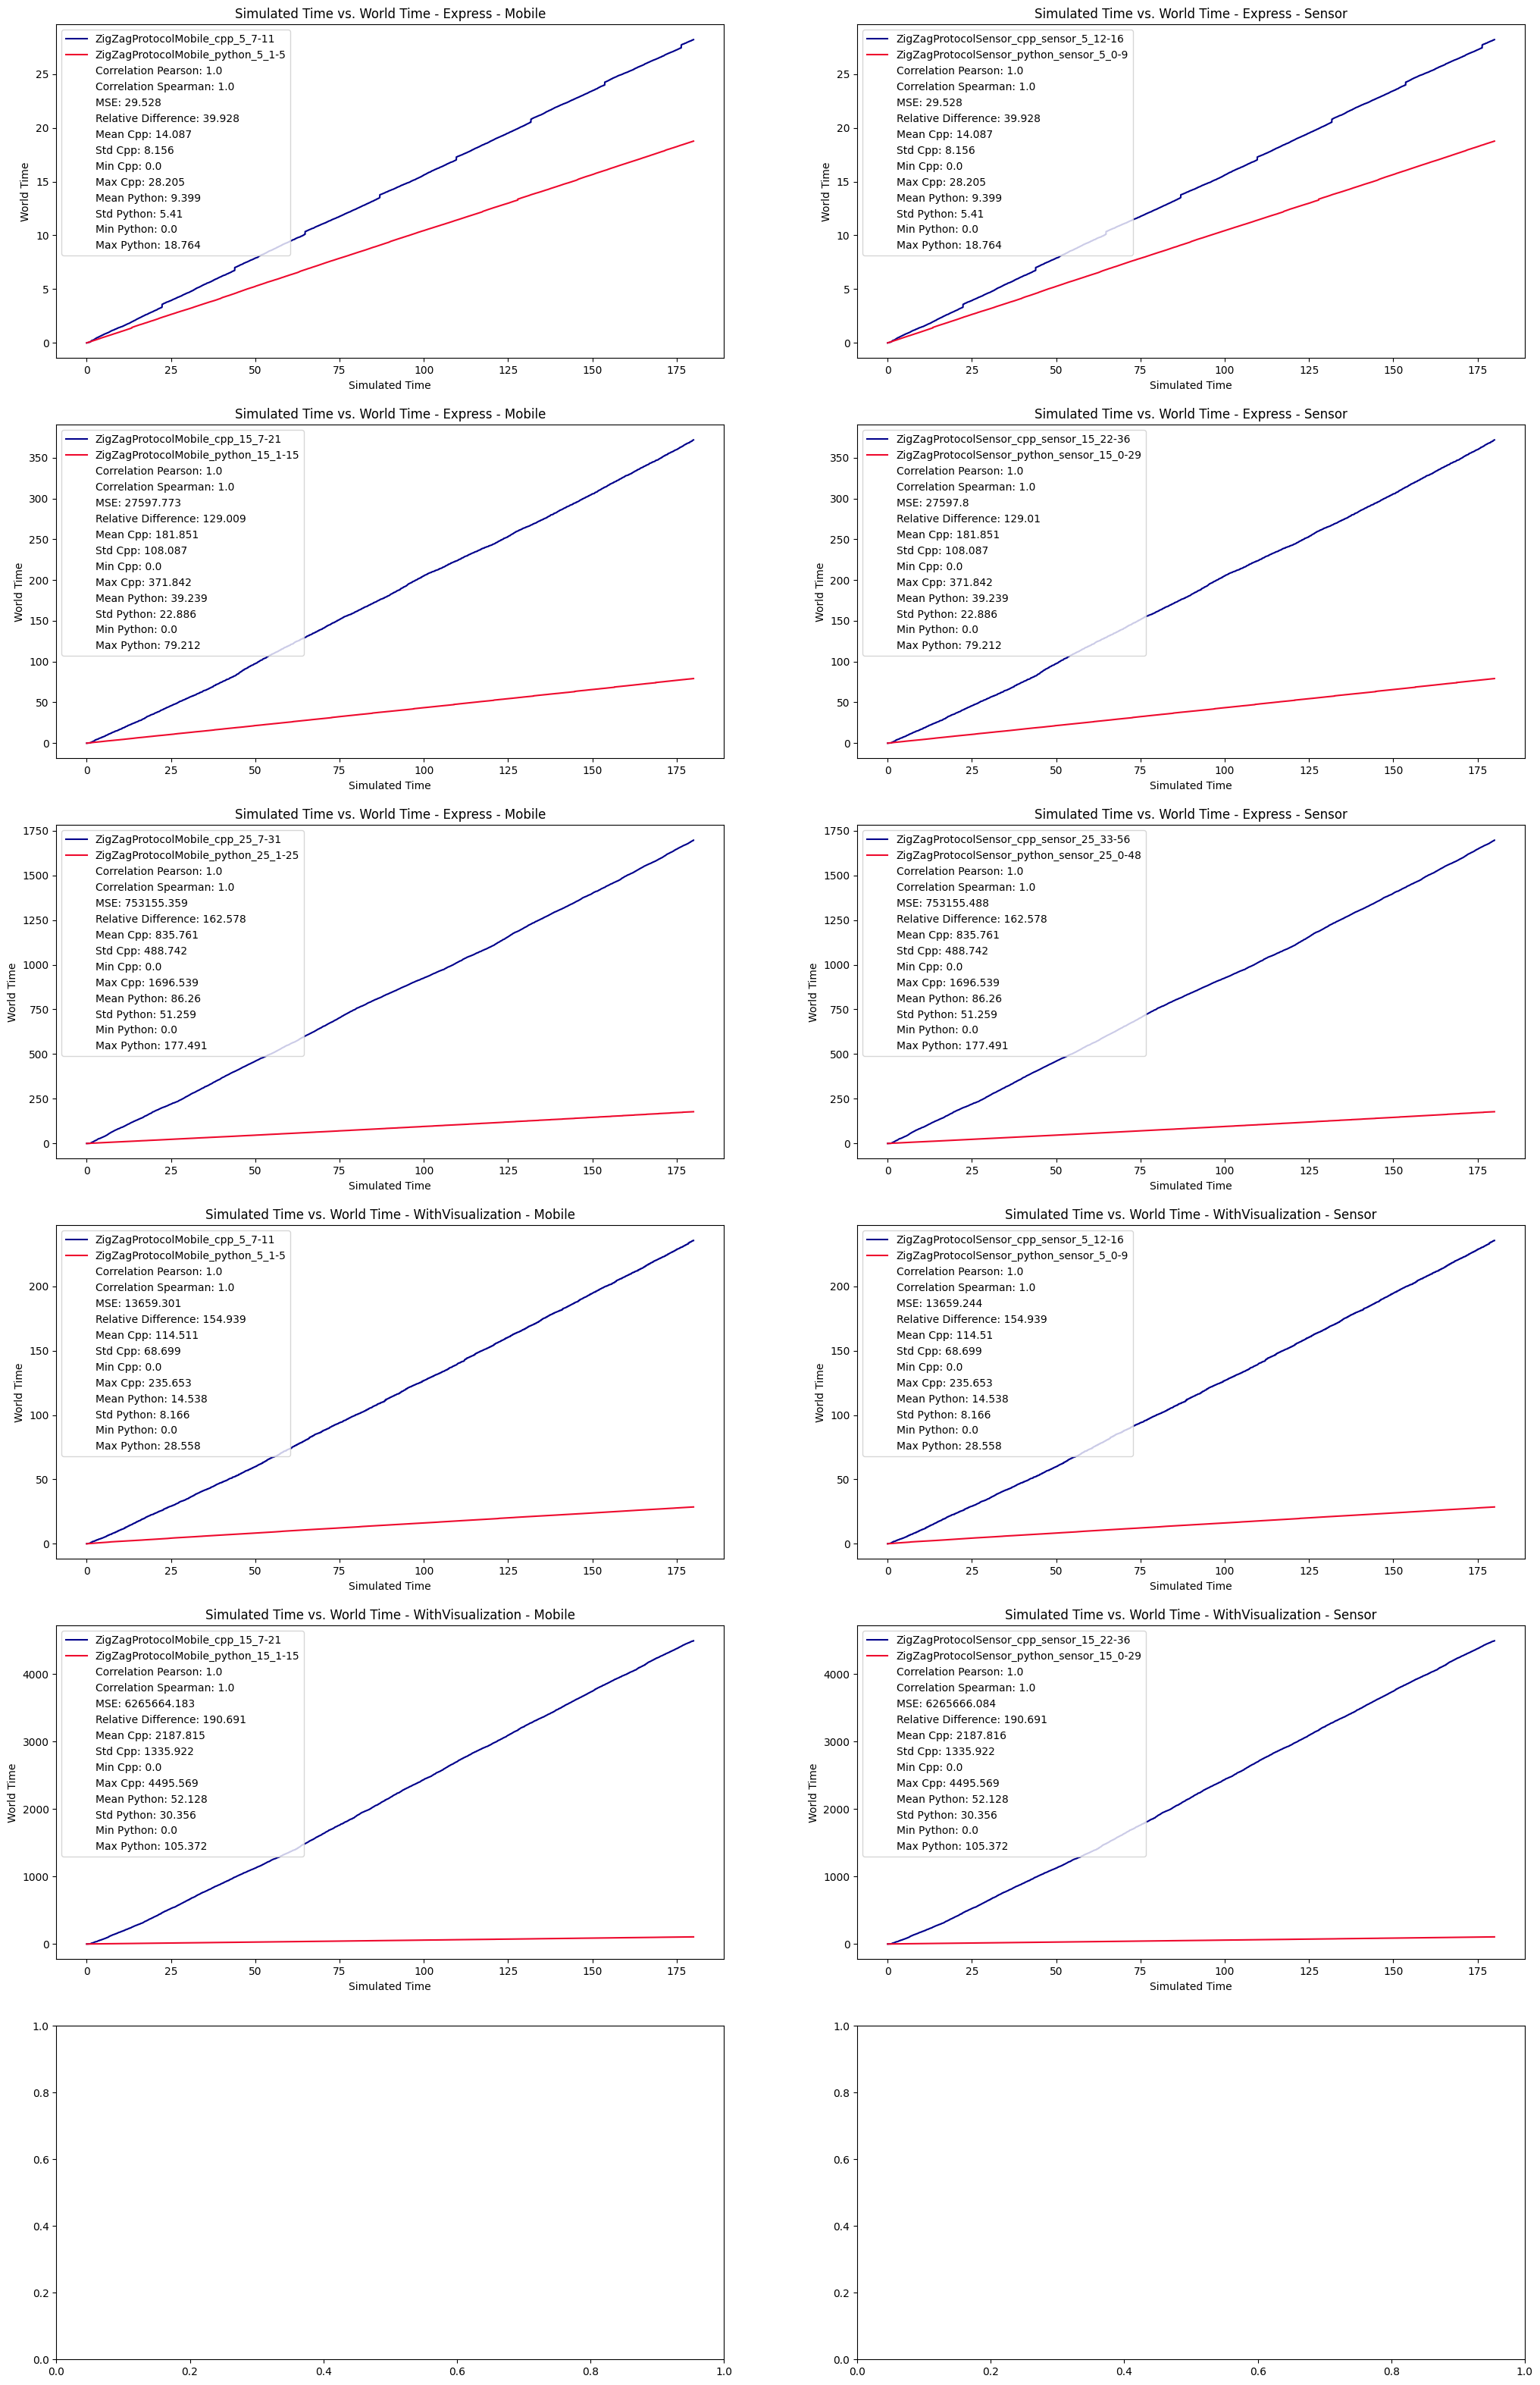

In [34]:

fig1, axs1 = plt.subplots(6,2, figsize=(25, 40))
paths = ["express" , "with_visualization"]
codes = ["cpp", "python"]
data_columns = ["real_time"]
amount_mobile_sensors = [5, 15, 25]


lists = {
    "python" : [[1,2,3,4,5], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]],
    "cpp" : [[7,8,9,10,11], [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]],
    "python_sensor": [[0,6,7,8,9], [0, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [0, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]],
    "cpp_sensor": [[12,13,14,15,16], [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36], [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]]
}

for idx_amount_mobile_sensor, amount_mobile_sensor in enumerate(amount_mobile_sensors):
    for idx_path, path in enumerate(paths):
        for idx_data_column, data_column in enumerate(data_columns):
            
            dfs = {
                "cpp" : pd.DataFrame(),
                "python" : pd.DataFrame(),
                "cpp_sensor" : pd.DataFrame(),
                "python_sensor" : pd.DataFrame(),
            }

            for idx_code, code in enumerate(codes): 
                for extension in ["", "_sensor"]:
                    if "sensor" in code+extension:
                        base_file_path = f"./exemplary_simulation_results/{path}/{code}/{amount_mobile_sensor}/simulation_real_time_{code}_{path}_{amount_mobile_sensor}_ZigZagProtocolSensor_"
                    else:    
                        base_file_path = f"./exemplary_simulation_results/{path}/{code}/{amount_mobile_sensor}/simulation_real_time_{code}_{path}_{amount_mobile_sensor}_ZigZagProtocolMobile_"

                    code = code+extension
                    elem_list = lists[code][idx_amount_mobile_sensor]
                    for elem in elem_list:
                        tmp_df = load_dataset(base_file_path + f"{elem}.csv")[['simulation_time', data_column]]
                            
                        min_value = tmp_df[data_column].min()
                        tmp_df[data_column] -= min_value
                        tmp_df = tmp_df[['simulation_time',data_column]].rename(columns={data_column: f"{data_column}_{elem}"})

                        dfs[code] = tmp_df if len(dfs[code]) == 0 else pd.merge(dfs[code], tmp_df, on='simulation_time', how='inner')

                    dfs[code][f'{data_column}'] = dfs[code].loc[:, dfs[code].columns != 'simulation_time'].mean(axis=1) 
                
                    row = dfs[code][dfs[code]['simulation_time']>=180].index.tolist()
                    if row != []:
                        dfs[code] = dfs[code].iloc[:row[0]-1] 

                    dfs[code] = dfs[code][['simulation_time', data_column]]

            index = idx_amount_mobile_sensor + len(amount_mobile_sensors)*idx_path + len(amount_mobile_sensors)*len(data_columns)*idx_data_column

            for key, items in dfs.items():
                leftRight = 1 if "sensor" in key else 0
                color = blue_palette if 'cpp' in key else warm_palette
                if "sensor" in key:
                    axs1[index][leftRight].plot(items.iloc[:, 0], items.iloc[:, 1], label=f"ZigZagProtocolSensor_{key}_{amount_mobile_sensor}_{lists[key][idx_amount_mobile_sensor][0]}-{lists[key][idx_amount_mobile_sensor][-1]}", color=random.choice(color))
                    axs1[index][leftRight].set_title(f'Simulated Time vs. World Time - {convert(path)} - Sensor')
                else: 
                    axs1[index][leftRight].plot(items.iloc[:, 0], items.iloc[:, 1], label=f"ZigZagProtocolMobile_{key}_{amount_mobile_sensor}_{lists[key][idx_amount_mobile_sensor][0]}-{lists[key][idx_amount_mobile_sensor][-1]}", color=random.choice(color))
                    axs1[index][leftRight].set_title(f'Simulated Time vs. World Time - {convert(path)} - Mobile')
                
                axs1[index][leftRight].set_xlabel('Simulated Time')
                axs1[index][leftRight].set_ylabel('World Time')
            
            extend_legend(axs1[index][0], dfs["cpp"], dfs["python"], data_column)
            extend_legend(axs1[index][1], dfs["cpp_sensor"], dfs["python_sensor"], data_column)
            axs1[index][0].legend()
            axs1[index][1].legend()


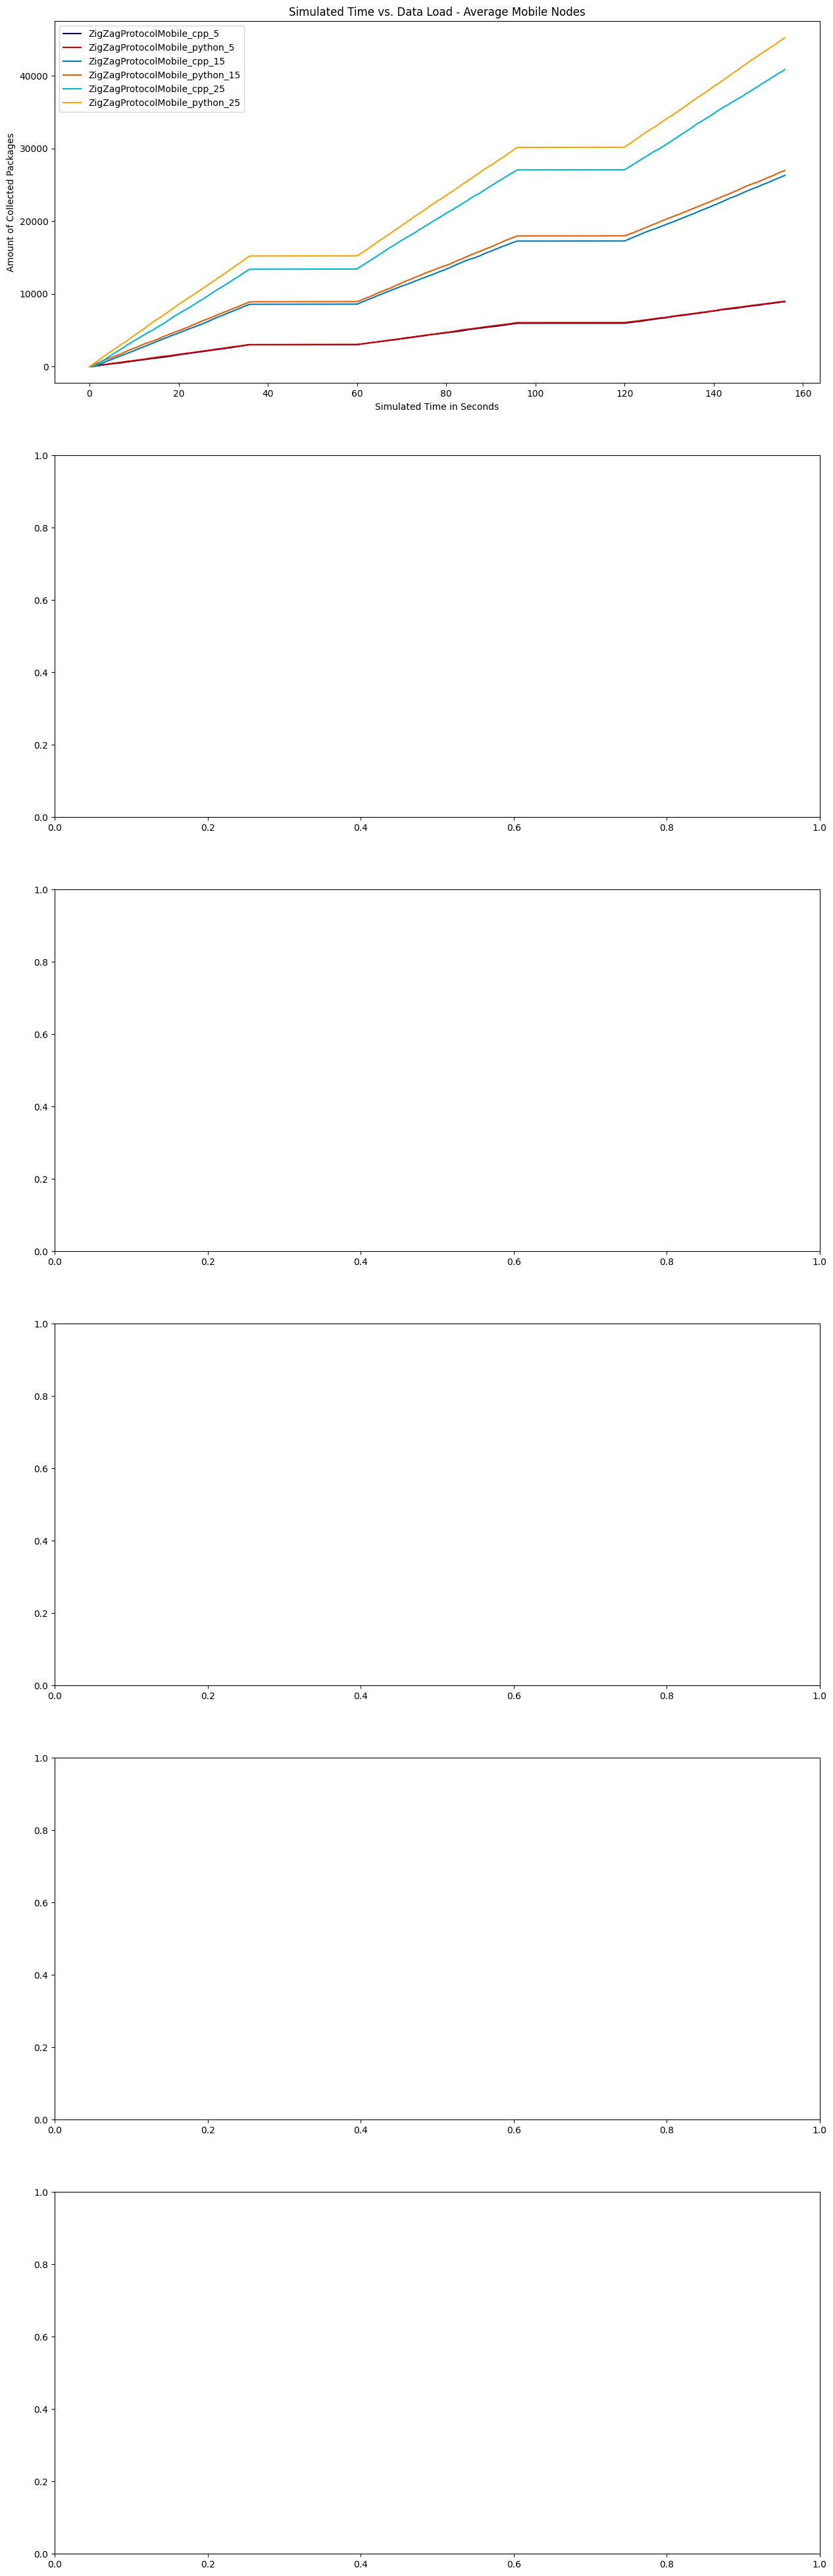

In [12]:
blue_palette = ['#03045e', '#0077b6', '#00b4d8']
warm_palette = ['#d00000', '#e85d04', '#faa307']

fig2, axs2 = plt.subplots(6,1, figsize=(15, 50))
paths = ["express"]  #"with_visualization"
codes = ["cpp", "python"]
data_columns = ["current_data_load"]
amount_mobile_sensors = [5, 15, 25]


lists = {
    "python" : [[1,2,3,4,5], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]],
    "cpp" : [[7,8,9,10,11], [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]],
}

for idx_amount_mobile_sensor, amount_mobile_sensor in enumerate(amount_mobile_sensors):
    for idx_path, path in enumerate(paths):
        for idx_data_column, data_column in enumerate(data_columns):
            
            dfs = {
                "cpp" : pd.DataFrame(),
                "python" : pd.DataFrame(),

            }

            for idx_code, code in enumerate(codes): 
                base_file_path = f"./exemplary_simulation_results/{path}/{code}/{amount_mobile_sensor}/tracked_variables_{code}_{path}_{amount_mobile_sensor}_ZigZagProtocolMobile_"

                elem_list = lists[code][idx_amount_mobile_sensor]
                for elem in elem_list:
                    tmp_df_resampled = load_dataset(base_file_path + f"{elem}.csv")[['simulation_time', data_column]]
                    tmp_df_resampled['simulation_time'] = pd.to_datetime(tmp_df_resampled['simulation_time'], unit='s')
                    tmp_df_resampled = tmp_df_resampled.set_index('simulation_time')
                    tmp_df_resampled = tmp_df_resampled.resample('0.1S').mean().interpolate()
                    tmp_df_resampled['simulation_time_1'] = tmp_df_resampled.index.time
                    tmp_df_resampled['simulation_time_2'] =  tmp_df_resampled['simulation_time_1'].apply(lambda x: x.strftime('%M.%S%f'))
                    tmp_df = tmp_df_resampled.rename(columns={data_column: f"{data_column}_{elem}"}).reset_index()[['simulation_time_2',f"{data_column}_{elem}"]]
                    tmp_df = tmp_df.rename(columns={"simulation_time_2": "simulation_time"})
                    tmp_df['simulation_time'] = tmp_df['simulation_time'].astype(float)
                    tmp_df['simulation_time'] = tmp_df['simulation_time'] * 60

                    dfs[code] = tmp_df if len(dfs[code]) == 0 else pd.merge(dfs[code], tmp_df, on='simulation_time', how='inner')

                dfs[code][f'{data_column}'] = dfs[code].loc[:, dfs[code].columns != 'simulation_time'].mean(axis=1) 
            
                dfs[code] = dfs[code][['simulation_time', data_column]]

            index = 0 # idx_amount_mobile_sensor + len(amount_mobile_sensors)*idx_path + len(amount_mobile_sensors)*len(data_columns)*idx_data_column

            for key, items in dfs.items():
                color = blue_palette if 'cpp' in key else warm_palette
                axs2[index].plot(items.iloc[:, 0], items.iloc[:, 1], label=f"ZigZagProtocolMobile_{key}_{amount_mobile_sensor}", color=color[idx_amount_mobile_sensor])
                axs2[index].set_title(f'Simulated Time vs. Data Load - Average Mobile Nodes')
                
                axs2[index].set_xlabel('Simulated Time in Seconds')
                axs2[index].set_ylabel('Amount of Collected Packages')
            
            # extend_legend(axs2[index], dfs["cpp"], dfs["python"], data_column)
            axs2[index].legend()


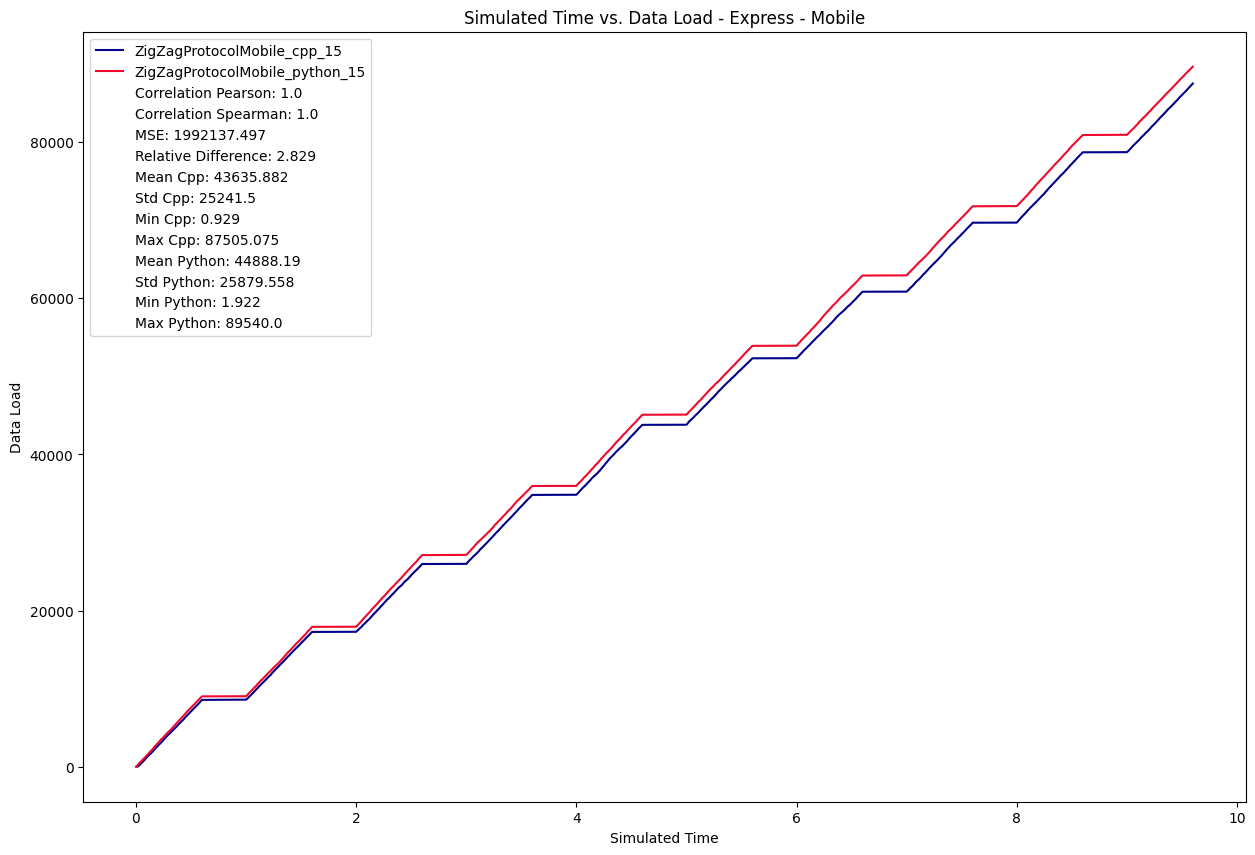

In [40]:

fig3, axs3 = plt.subplots(1,1, figsize=(15, 10))
paths = ["express"]
codes = ["cpp", "python"]
data_columns = ["current_data_load"]
amount_mobile_sensors = [15]


lists = {
    "python" : [ [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]],
    "cpp" : [[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]],
}

for idx_amount_mobile_sensor, amount_mobile_sensor in enumerate(amount_mobile_sensors):
    for idx_path, path in enumerate(paths):
        for idx_data_column, data_column in enumerate(data_columns):
            
            dfs = {
                "cpp" : pd.DataFrame(),
                "python" : pd.DataFrame(),

            }

            for idx_code, code in enumerate(codes): 
                base_file_path = f"./exemplary_simulation_results/{path}/{code}/{amount_mobile_sensor}_2/tracked_variables_{code}_{path}_{amount_mobile_sensor}_ZigZagProtocolMobile_"

                elem_list = lists[code][idx_amount_mobile_sensor]
                for elem in elem_list:
                    tmp_df_resampled = load_dataset(base_file_path + f"{elem}.csv")[['simulation_time', data_column]]
                    tmp_df_resampled['simulation_time'] = pd.to_datetime(tmp_df_resampled['simulation_time'], unit='s')
                    tmp_df_resampled = tmp_df_resampled.set_index('simulation_time')
                    tmp_df_resampled = tmp_df_resampled.resample('0.1S').mean().interpolate()
                    tmp_df_resampled['simulation_time_1'] = tmp_df_resampled.index.time
                    tmp_df_resampled['simulation_time_2'] =  tmp_df_resampled['simulation_time_1'].apply(lambda x: x.strftime('%M.%S%f'))
                    tmp_df = tmp_df_resampled.rename(columns={data_column: f"{data_column}_{elem}"}).reset_index()[['simulation_time_2',f"{data_column}_{elem}"]]
                    tmp_df = tmp_df.rename(columns={"simulation_time_2": "simulation_time"})
                    tmp_df['simulation_time'] = tmp_df['simulation_time'].astype(float)

                    dfs[code] = tmp_df if len(dfs[code]) == 0 else pd.merge(dfs[code], tmp_df, on='simulation_time', how='inner')

                dfs[code][f'{data_column}'] = dfs[code].loc[:, dfs[code].columns != 'simulation_time'].mean(axis=1) 
            
                dfs[code] = dfs[code][['simulation_time', data_column]]

            index = 0

            for key, items in dfs.items():
                color = blue_palette if 'cpp' in key else warm_palette
                axs3.plot(items.iloc[:, 0], items.iloc[:, 1], label=f"ZigZagProtocolMobile_{key}_{amount_mobile_sensor}", color=random.choice(color))
                axs3.set_title(f'Simulated Time vs. Data Load - {convert(path)} - Mobile')
                
                axs3.set_xlabel('Simulated Time')
                axs3.set_ylabel('Data Load')
            
            extend_legend(axs3, dfs["cpp"], dfs["python"], data_column)
            axs3.legend()

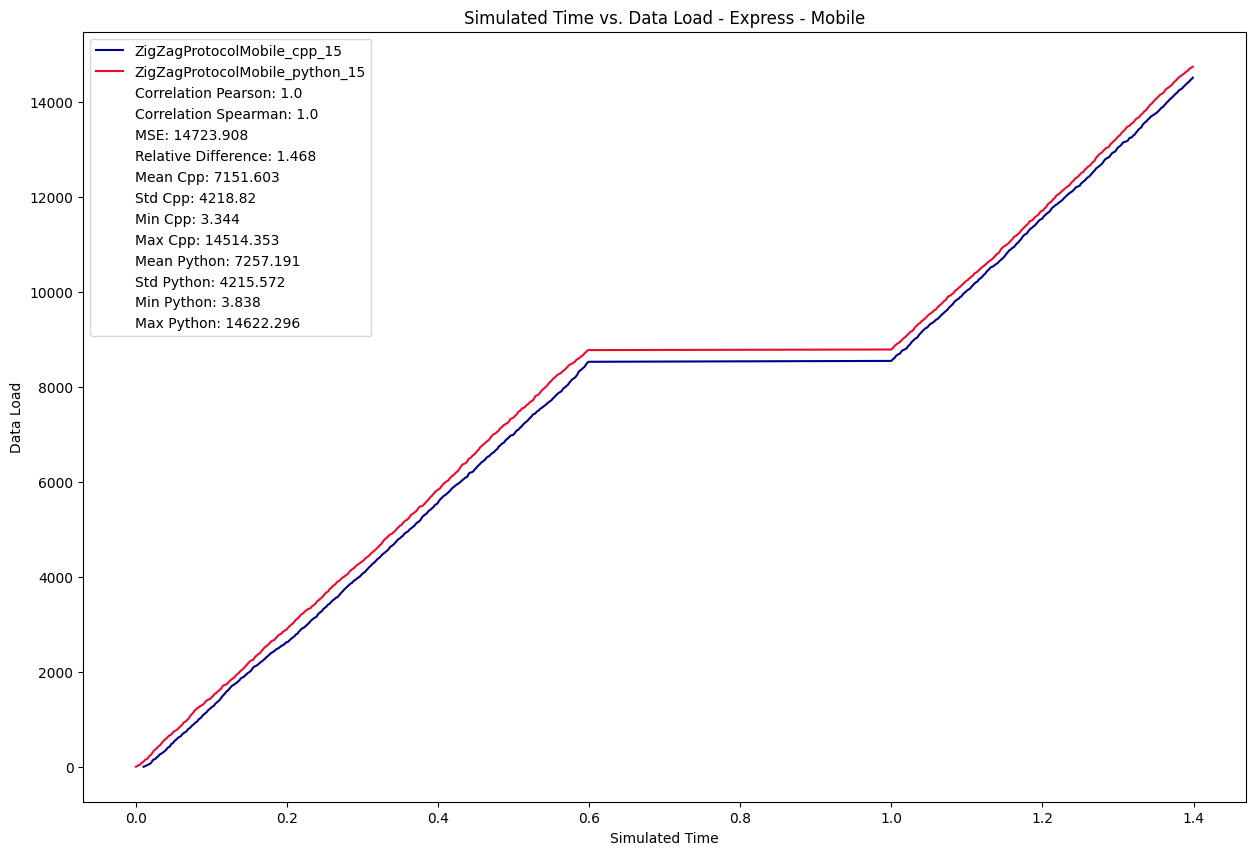

In [41]:

fig4, axs4 = plt.subplots(1,1, figsize=(15, 10))
paths = ["express"]
codes = ["cpp", "python"]
data_columns = ["current_data_load"]
amount_mobile_sensors = [15]


lists = {
    "python" : [ [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]],
    "cpp" : [[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]],
}

for idx_amount_mobile_sensor, amount_mobile_sensor in enumerate(amount_mobile_sensors):
    for idx_path, path in enumerate(paths):
        for idx_data_column, data_column in enumerate(data_columns):
            
            dfs = {
                "cpp" : pd.DataFrame(),
                "python" : pd.DataFrame(),

            }

            for idx_code, code in enumerate(codes): 
                base_file_path = f"./exemplary_simulation_results/{path}/{code}/{amount_mobile_sensor}_3/tracked_variables_{code}_{path}_{amount_mobile_sensor}_ZigZagProtocolMobile_"

                elem_list = lists[code][idx_amount_mobile_sensor]
                for elem in elem_list:
                    tmp_df_resampled = load_dataset(base_file_path + f"{elem}.csv")[['simulation_time', data_column]]
                    tmp_df_resampled['simulation_time'] = pd.to_datetime(tmp_df_resampled['simulation_time'], unit='s')
                    tmp_df_resampled = tmp_df_resampled.set_index('simulation_time')
                    tmp_df_resampled = tmp_df_resampled.resample('0.1S').mean().interpolate()
                    tmp_df_resampled['simulation_time_1'] = tmp_df_resampled.index.time
                    tmp_df_resampled['simulation_time_2'] =  tmp_df_resampled['simulation_time_1'].apply(lambda x: x.strftime('%M.%S%f'))
                    tmp_df = tmp_df_resampled.rename(columns={data_column: f"{data_column}_{elem}"}).reset_index()[['simulation_time_2',f"{data_column}_{elem}"]]
                    tmp_df = tmp_df.rename(columns={"simulation_time_2": "simulation_time"})
                    tmp_df['simulation_time'] = tmp_df['simulation_time'].astype(float)

                    dfs[code] = tmp_df if len(dfs[code]) == 0 else pd.merge(dfs[code], tmp_df, on='simulation_time', how='inner')

                dfs[code][f'{data_column}'] = dfs[code].loc[:, dfs[code].columns != 'simulation_time'].mean(axis=1) 
            
                dfs[code] = dfs[code][['simulation_time', data_column]]

            index = 0

            for key, items in dfs.items():
                color = blue_palette if 'cpp' in key else warm_palette
                axs4.plot(items.iloc[:, 0], items.iloc[:, 1], label=f"ZigZagProtocolMobile_{key}_{amount_mobile_sensor}", color=random.choice(color))
                axs4.set_title(f'Simulated Time vs. Data Load - {convert(path)} - Mobile')
                
                axs4.set_xlabel('Simulated Time')
                axs4.set_ylabel('Data Load')
            
            extend_legend(axs4, dfs["cpp"], dfs["python"], data_column)
            axs4.legend()

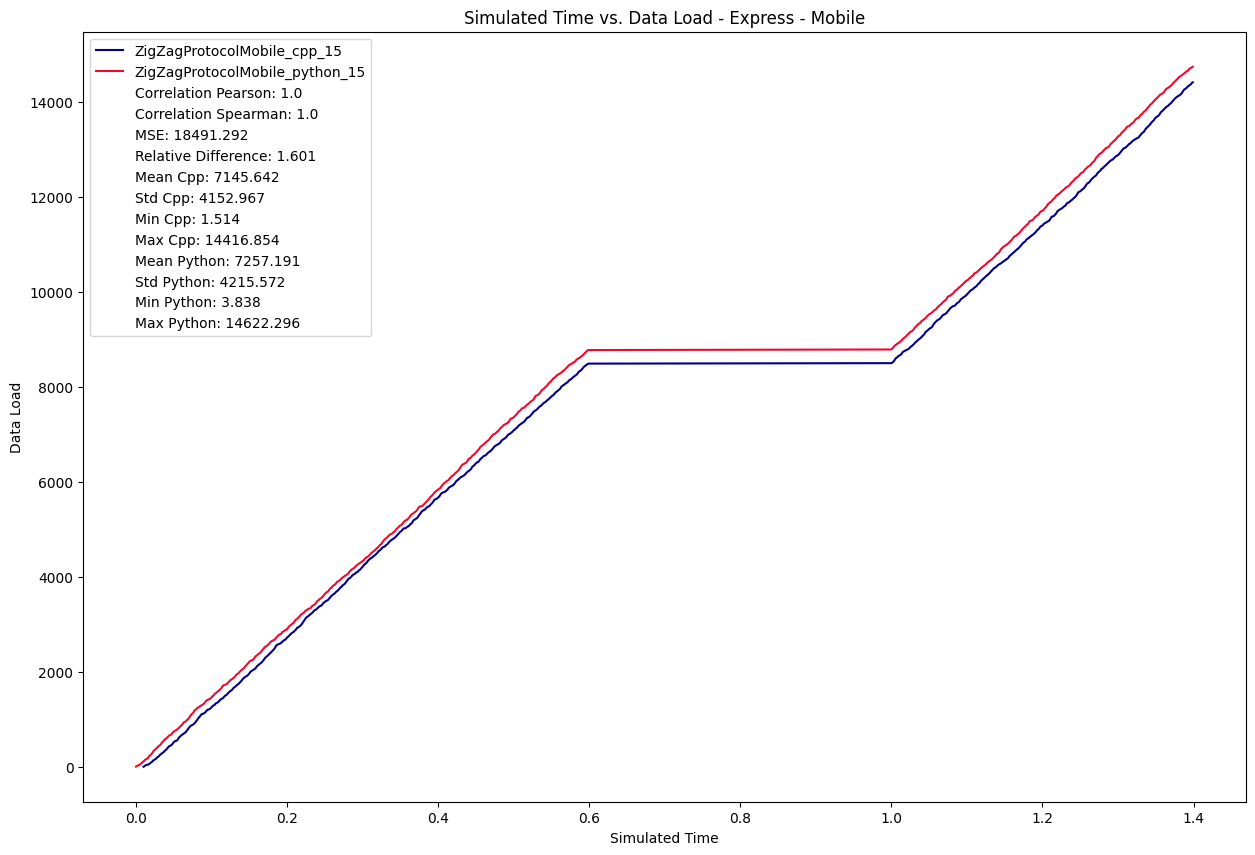

In [42]:

fig4, axs4 = plt.subplots(1,1, figsize=(15, 10))
paths = ["express"]
codes = ["cpp", "python"]
data_columns = ["current_data_load"]
amount_mobile_sensors = [15]


lists = {
    "python" : [ [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]],
    "cpp" : [[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]],
}

for idx_amount_mobile_sensor, amount_mobile_sensor in enumerate(amount_mobile_sensors):
    for idx_path, path in enumerate(paths):
        for idx_data_column, data_column in enumerate(data_columns):
            
            dfs = {
                "cpp" : pd.DataFrame(),
                "python" : pd.DataFrame(),

            }

            for idx_code, code in enumerate(codes): 
                base_file_path = f"./exemplary_simulation_results/{path}/{code}/{amount_mobile_sensor}_4/tracked_variables_{code}_{path}_{amount_mobile_sensor}_ZigZagProtocolMobile_"

                elem_list = lists[code][idx_amount_mobile_sensor]
                for elem in elem_list:
                    tmp_df_resampled = load_dataset(base_file_path + f"{elem}.csv")[['simulation_time', data_column]]
                    tmp_df_resampled['simulation_time'] = pd.to_datetime(tmp_df_resampled['simulation_time'], unit='s')
                    tmp_df_resampled = tmp_df_resampled.set_index('simulation_time')
                    tmp_df_resampled = tmp_df_resampled.resample('0.1S').mean().interpolate()
                    tmp_df_resampled['simulation_time_1'] = tmp_df_resampled.index.time
                    tmp_df_resampled['simulation_time_2'] =  tmp_df_resampled['simulation_time_1'].apply(lambda x: x.strftime('%M.%S%f'))
                    tmp_df = tmp_df_resampled.rename(columns={data_column: f"{data_column}_{elem}"}).reset_index()[['simulation_time_2',f"{data_column}_{elem}"]]
                    tmp_df = tmp_df.rename(columns={"simulation_time_2": "simulation_time"})
                    tmp_df['simulation_time'] = tmp_df['simulation_time'].astype(float)

                    dfs[code] = tmp_df if len(dfs[code]) == 0 else pd.merge(dfs[code], tmp_df, on='simulation_time', how='inner')

                dfs[code][f'{data_column}'] = dfs[code].loc[:, dfs[code].columns != 'simulation_time'].mean(axis=1) 
            
                dfs[code] = dfs[code][['simulation_time', data_column]]

            index = 0

            for key, items in dfs.items():
                color = blue_palette if 'cpp' in key else warm_palette
                axs4.plot(items.iloc[:, 0], items.iloc[:, 1], label=f"ZigZagProtocolMobile_{key}_{amount_mobile_sensor}", color=random.choice(color))
                axs4.set_title(f'Simulated Time vs. Data Load - {convert(path)} - Mobile')
                
                axs4.set_xlabel('Simulated Time')
                axs4.set_ylabel('Data Load')
            
            extend_legend(axs4, dfs["cpp"], dfs["python"], data_column)
            axs4.legend()

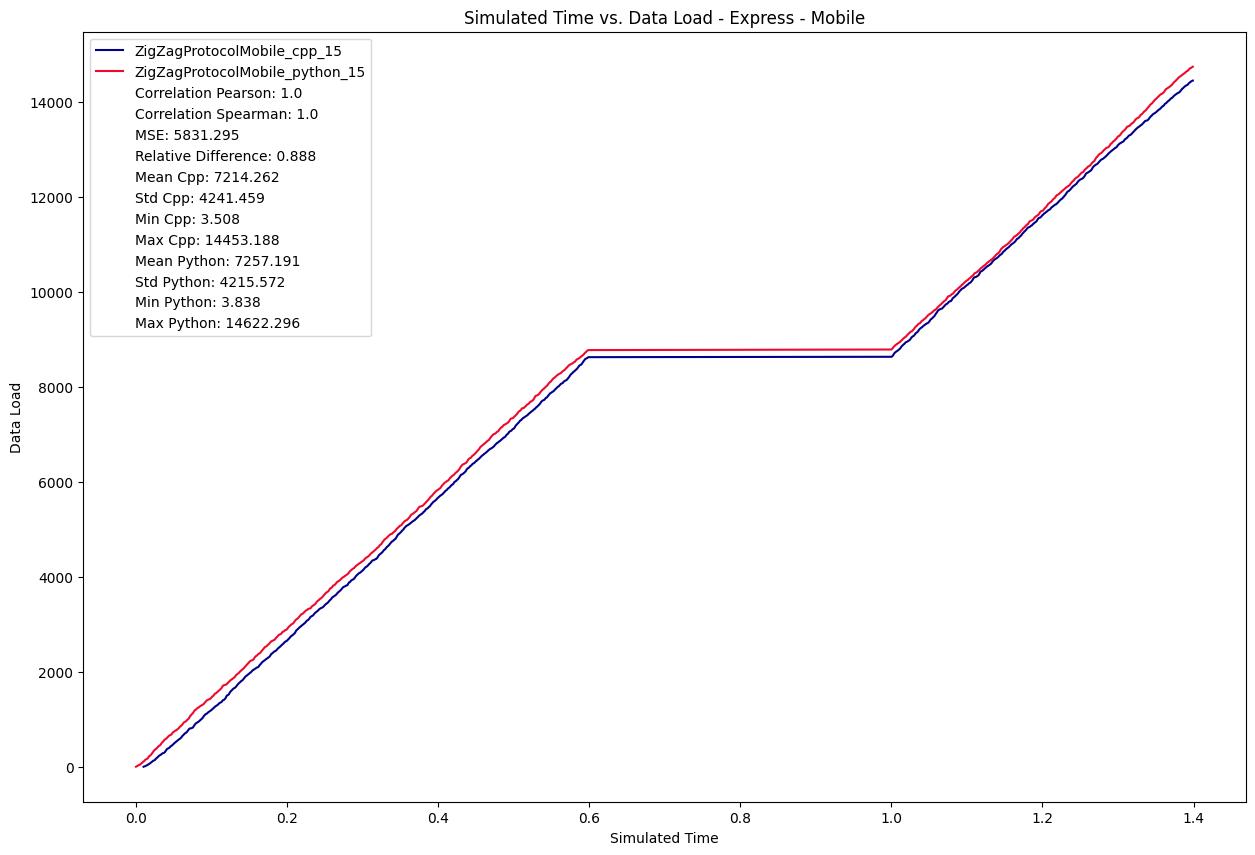

In [43]:

fig4, axs4 = plt.subplots(1,1, figsize=(15, 10))
paths = ["express"]
codes = ["cpp", "python"]
data_columns = ["current_data_load"]
amount_mobile_sensors = [15]


lists = {
    "python" : [ [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]],
    "cpp" : [[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]],
}

for idx_amount_mobile_sensor, amount_mobile_sensor in enumerate(amount_mobile_sensors):
    for idx_path, path in enumerate(paths):
        for idx_data_column, data_column in enumerate(data_columns):
            
            dfs = {
                "cpp" : pd.DataFrame(),
                "python" : pd.DataFrame(),

            }

            for idx_code, code in enumerate(codes): 
                base_file_path = f"./exemplary_simulation_results/{path}/{code}/{amount_mobile_sensor}_5/tracked_variables_{code}_{path}_{amount_mobile_sensor}_ZigZagProtocolMobile_"

                elem_list = lists[code][idx_amount_mobile_sensor]
                for elem in elem_list:
                    tmp_df_resampled = load_dataset(base_file_path + f"{elem}.csv")[['simulation_time', data_column]]
                    tmp_df_resampled['simulation_time'] = pd.to_datetime(tmp_df_resampled['simulation_time'], unit='s')
                    tmp_df_resampled = tmp_df_resampled.set_index('simulation_time')
                    tmp_df_resampled = tmp_df_resampled.resample('0.1S').mean().interpolate()
                    tmp_df_resampled['simulation_time_1'] = tmp_df_resampled.index.time
                    tmp_df_resampled['simulation_time_2'] =  tmp_df_resampled['simulation_time_1'].apply(lambda x: x.strftime('%M.%S%f'))
                    tmp_df = tmp_df_resampled.rename(columns={data_column: f"{data_column}_{elem}"}).reset_index()[['simulation_time_2',f"{data_column}_{elem}"]]
                    tmp_df = tmp_df.rename(columns={"simulation_time_2": "simulation_time"})
                    tmp_df['simulation_time'] = tmp_df['simulation_time'].astype(float)

                    dfs[code] = tmp_df if len(dfs[code]) == 0 else pd.merge(dfs[code], tmp_df, on='simulation_time', how='inner')

                dfs[code][f'{data_column}'] = dfs[code].loc[:, dfs[code].columns != 'simulation_time'].mean(axis=1) 
            
                dfs[code] = dfs[code][['simulation_time', data_column]]

            index = 0

            for key, items in dfs.items():
                color = blue_palette if 'cpp' in key else warm_palette
                axs4.plot(items.iloc[:, 0], items.iloc[:, 1], label=f"ZigZagProtocolMobile_{key}_{amount_mobile_sensor}", color=random.choice(color))
                axs4.set_title(f'Simulated Time vs. Data Load - {convert(path)} - Mobile')
                
                axs4.set_xlabel('Simulated Time')
                axs4.set_ylabel('Data Load')
            
            extend_legend(axs4, dfs["cpp"], dfs["python"], data_column)
            axs4.legend()

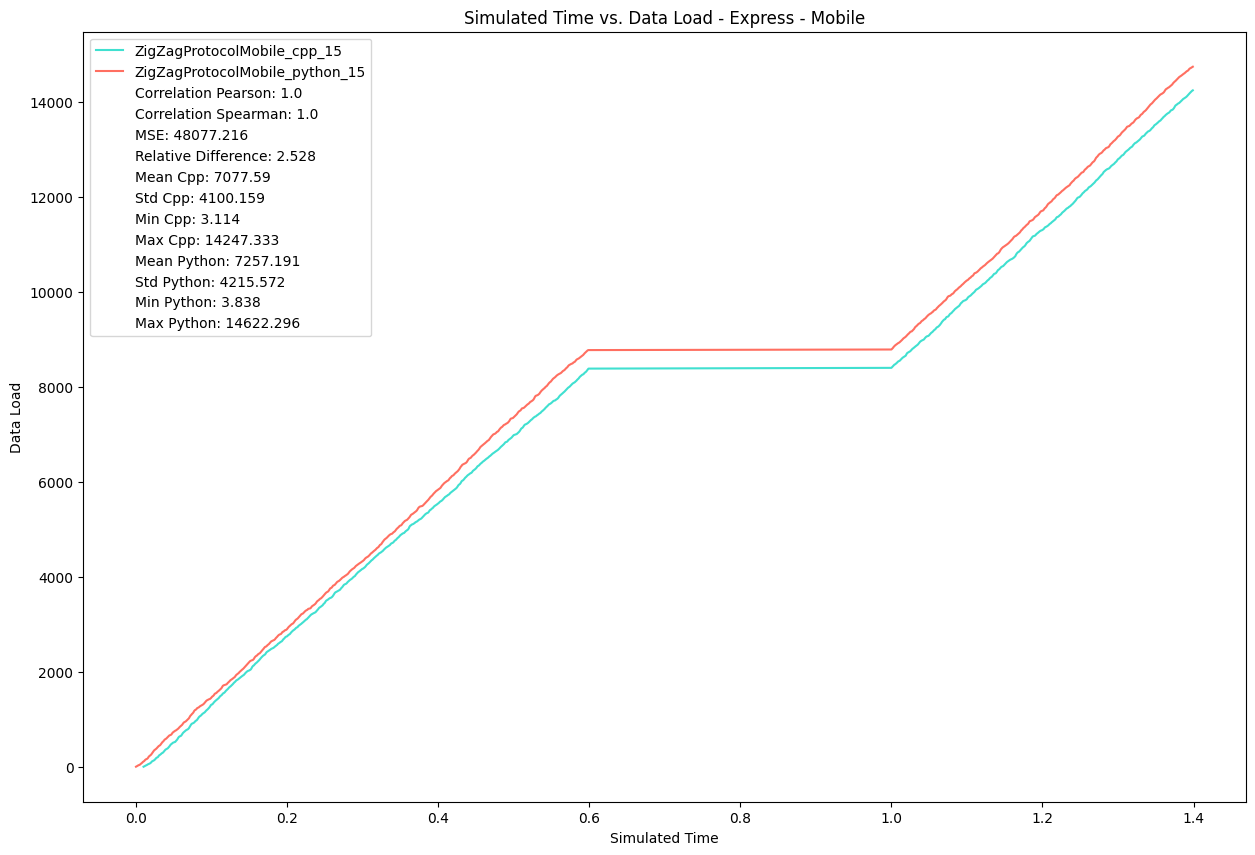

In [48]:

# fig4, axs4 = plt.subplots(1,1, figsize=(15, 10))
fig4, axs4 = plt.subplots(6,1, figsize=(15, 50))
paths = ["express"]
codes = ["cpp", "python"]
data_columns = ["current_data_load"]
amount_mobile_sensors = [15]


lists = {
    "python" : [ [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]],
    "cpp" : [[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]],
}

for idx_amount_mobile_sensor, amount_mobile_sensor in enumerate(amount_mobile_sensors):
    for idx_path, path in enumerate(paths):
        for idx_data_column, data_column in enumerate(data_columns):
            
            dfs = {
                "cpp" : pd.DataFrame(),
                "python" : pd.DataFrame(),

            }

            for idx_code, code in enumerate(codes): 
                base_file_path = f"./exemplary_simulation_results/{path}/{code}/{amount_mobile_sensor}_6/tracked_variables_{code}_{path}_{amount_mobile_sensor}_ZigZagProtocolMobile_"

                elem_list = lists[code][idx_amount_mobile_sensor]
                for elem in elem_list:
                    tmp_df_resampled = load_dataset(base_file_path + f"{elem}.csv")[['simulation_time', data_column]]
                    tmp_df_resampled['simulation_time'] = pd.to_datetime(tmp_df_resampled['simulation_time'], unit='s')
                    tmp_df_resampled = tmp_df_resampled.set_index('simulation_time')
                    tmp_df_resampled = tmp_df_resampled.resample('0.1S').mean().interpolate()
                    tmp_df_resampled['simulation_time_1'] = tmp_df_resampled.index.time
                    tmp_df_resampled['simulation_time_2'] =  tmp_df_resampled['simulation_time_1'].apply(lambda x: x.strftime('%M.%S%f'))
                    tmp_df = tmp_df_resampled.rename(columns={data_column: f"{data_column}_{elem}"}).reset_index()[['simulation_time_2',f"{data_column}_{elem}"]]
                    tmp_df = tmp_df.rename(columns={"simulation_time_2": "simulation_time"})
                    tmp_df['simulation_time'] = tmp_df['simulation_time'].astype(float)

                    dfs[code] = tmp_df if len(dfs[code]) == 0 else pd.merge(dfs[code], tmp_df, on='simulation_time', how='inner')

                dfs[code][f'{data_column}'] = dfs[code].loc[:, dfs[code].columns != 'simulation_time'].mean(axis=1) 
            
                dfs[code] = dfs[code][['simulation_time', data_column]]

            index = 0

            for key, items in dfs.items():
                color = blue_palette if 'cpp' in key else warm_palette
                axs4.plot(items.iloc[:, 0], items.iloc[:, 1], label=f"ZigZagProtocolMobile_{key}_{amount_mobile_sensor}", color=random.choice(color))
                axs4.set_title(f'Simulated Time vs. Data Load - {convert(path)} - Mobile')
                
                axs4.set_xlabel('Simulated Time')
                axs4.set_ylabel('Data Load')
            
            extend_legend(axs4, dfs["cpp"], dfs["python"], data_column)
            axs4.legend()

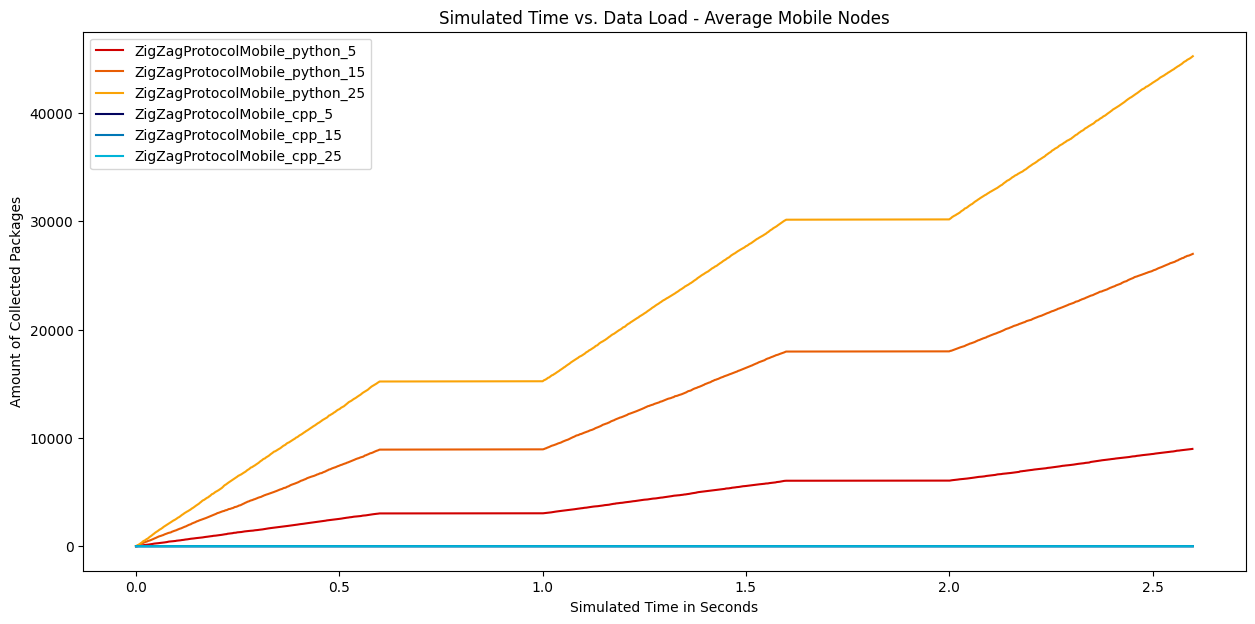

In [26]:
blue_palette = ['#03045e', '#0077b6', '#00b4d8']
warm_palette = ['#d00000', '#e85d04', '#faa307']

fig4, axs4 = plt.subplots(1,1, figsize=(15, 7))
paths = ["express"]
codes = ["python"]
data_columns = ["current_data_load"]
amount_mobile_sensors = [5,15,25]


lists = {
    "python" : [ [1,2,3,4,5], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]],
    "cpp" : [[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]],
}

for idx_amount_mobile_sensor, amount_mobile_sensor in enumerate(amount_mobile_sensors):
    for idx_path, path in enumerate(paths):
        for idx_data_column, data_column in enumerate(data_columns):
            
            dfs = {
                # "cpp" : pd.DataFrame(),
                "python" : pd.DataFrame(),

            }

            for idx_code, code in enumerate(codes): 
                base_file_path = f"./exemplary_simulation_results/{path}/{code}/{amount_mobile_sensor}/tracked_variables_{code}_{path}_{amount_mobile_sensor}_ZigZagProtocolMobile_"

                elem_list = lists[code][idx_amount_mobile_sensor]
                for elem in elem_list:
                    tmp_df_resampled = load_dataset(base_file_path + f"{elem}.csv")[['simulation_time', data_column]]
                    tmp_df_resampled['simulation_time'] = pd.to_datetime(tmp_df_resampled['simulation_time'], unit='s')
                    tmp_df_resampled = tmp_df_resampled.set_index('simulation_time')
                    tmp_df_resampled = tmp_df_resampled.resample('0.1S').mean().interpolate()
                    tmp_df_resampled['simulation_time_1'] = tmp_df_resampled.index.time
                    tmp_df_resampled['simulation_time_2'] =  tmp_df_resampled['simulation_time_1'].apply(lambda x: x.strftime('%M.%S%f'))
                    tmp_df = tmp_df_resampled.rename(columns={data_column: f"{data_column}_{elem}"}).reset_index()[['simulation_time_2',f"{data_column}_{elem}"]]
                    tmp_df = tmp_df.rename(columns={"simulation_time_2": "simulation_time"})
                    tmp_df['simulation_time'] = tmp_df['simulation_time'].astype(float)

                    dfs[code] = tmp_df if len(dfs[code]) == 0 else pd.merge(dfs[code], tmp_df, on='simulation_time', how='inner')

                dfs[code][f'{data_column}'] = dfs[code].loc[:, dfs[code].columns != 'simulation_time'].mean(axis=1) 
            
                dfs[code] = dfs[code][['simulation_time', data_column]]

            index = 0

            for key, items in dfs.items():
                color = blue_palette if 'cpp' in key else warm_palette
                axs4.plot(items.iloc[:, 0], items.iloc[:, 1], label=f"ZigZagProtocolMobile_{key}_{amount_mobile_sensor}", color=color[idx_amount_mobile_sensor])
                axs4.set_title(f'Simulated Time vs. Data Load - Average Mobile Nodes')
                
                axs4.set_xlabel('Simulated Time in Seconds')
                axs4.set_ylabel('Amount of Collected Packages')
            
            # extend_legend(axs4, dfs["cpp"], dfs["python"], data_column)


for i in range (3): 
    base_file_path = f"./exemplary_simulation_results/express/cpp/15_7/tracked_variables_cpp_express_15_ZigZagProtocolMobile_"

    dfs["python"]["current_data_load"].values[:] = 0

    dfs['cpp'] = dfs["python"]
    
    color = blue_palette
    axs4.plot(dfs['cpp'].iloc[:, 0], dfs['cpp'].iloc[:, 1], label=f"ZigZagProtocolMobile_cpp_{amount_mobile_sensors[i]}", color=color[i])
    
axs4.legend()

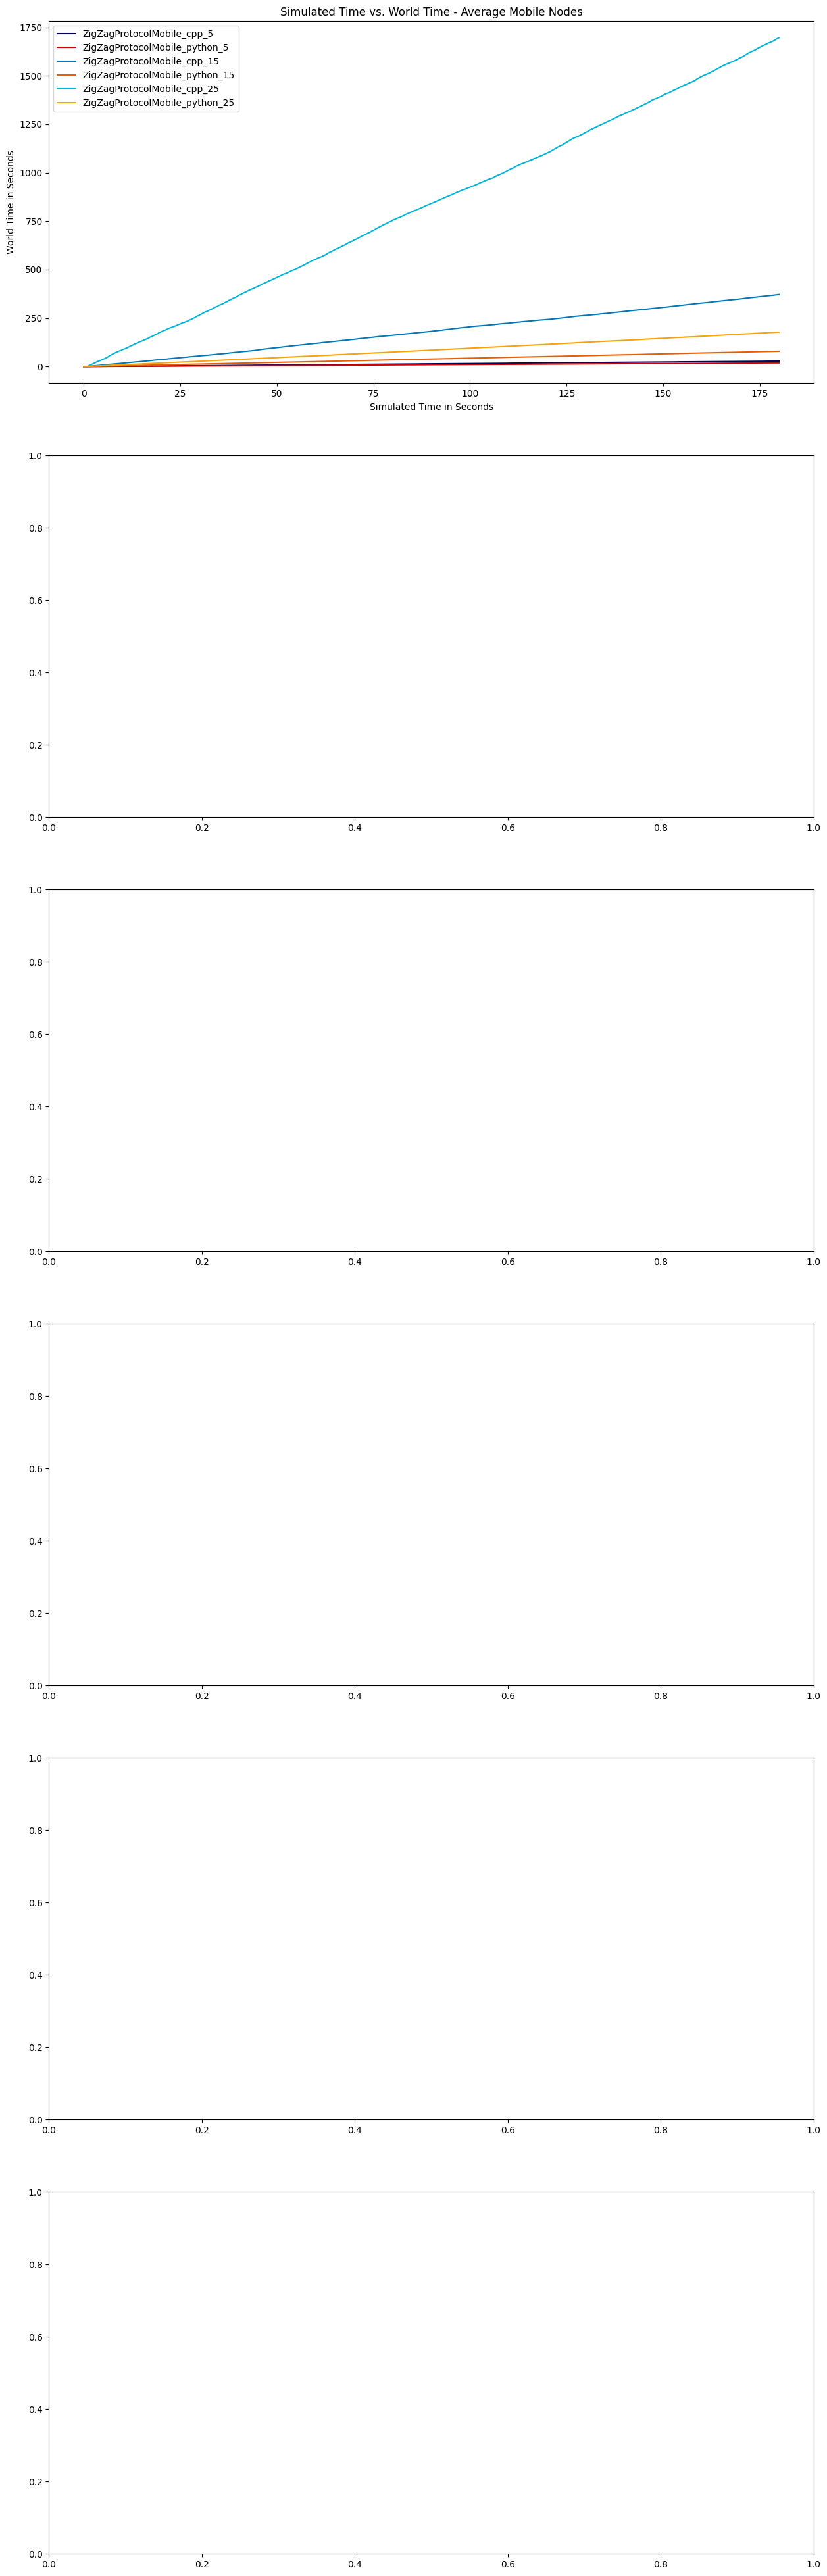

In [15]:
blue_palette = ['#03045e', '#0077b6', '#00b4d8']
warm_palette = ['#d00000', '#e85d04', '#faa307']

# fig1, axs1 = plt.subplots(2,2, figsize=(25,15))
fig1, axs1 = plt.subplots(6,1, figsize=(15, 50))
paths = ["express"]
codes = ["cpp", "python"]
data_columns = ["real_time"]
amount_mobile_sensors = [5, 15, 25]


lists = {
    "python" : [[1,2,3,4,5], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]],
    "cpp" : [[7,8,9,10,11], [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]],
    "python_sensor": [[0,6,7,8,9], [0, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [0, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]],
    "cpp_sensor": [[12,13,14,15,16], [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36], [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]]
}

for idx_amount_mobile_sensor, amount_mobile_sensor in enumerate(amount_mobile_sensors):
    for idx_path, path in enumerate(paths):
        for idx_data_column, data_column in enumerate(data_columns):
            
            dfs = {
                "cpp" : pd.DataFrame(),
                "python" : pd.DataFrame(),
                "cpp_sensor" : pd.DataFrame(),
                "python_sensor" : pd.DataFrame(),
            }

            for idx_code, code in enumerate(codes): 
                for extension in ["", "_sensor"]:
                    if "sensor" in code+extension:
                        base_file_path = f"./exemplary_simulation_results/{path}/{code}/{amount_mobile_sensor}/simulation_real_time_{code}_{path}_{amount_mobile_sensor}_ZigZagProtocolSensor_"
                    else:    
                        base_file_path = f"./exemplary_simulation_results/{path}/{code}/{amount_mobile_sensor}/simulation_real_time_{code}_{path}_{amount_mobile_sensor}_ZigZagProtocolMobile_"

                    code = code+extension
                    elem_list = lists[code][idx_amount_mobile_sensor]
                    for elem in elem_list:
                        tmp_df = load_dataset(base_file_path + f"{elem}.csv")[['simulation_time', data_column]]
                            
                        min_value = tmp_df[data_column].min()
                        tmp_df[data_column] -= min_value
                        tmp_df = tmp_df[['simulation_time',data_column]].rename(columns={data_column: f"{data_column}_{elem}"})

                        dfs[code] = tmp_df if len(dfs[code]) == 0 else pd.merge(dfs[code], tmp_df, on='simulation_time', how='inner')

                    dfs[code][f'{data_column}'] = dfs[code].loc[:, dfs[code].columns != 'simulation_time'].mean(axis=1) 
                
                    row = dfs[code][dfs[code]['simulation_time']>=180].index.tolist()
                    if row != []:
                        dfs[code] = dfs[code].iloc[:row[0]-1] 

                    dfs[code] = dfs[code][['simulation_time', data_column]]

            index = 0 # idx_amount_mobile_sensor + len(amount_mobile_sensors)*idx_path + len(amount_mobile_sensors)*len(data_columns)*idx_data_column

            for key, items in dfs.items():
                leftRight = 1 if "sensor" in key else 0
                color = blue_palette if 'cpp' in key else warm_palette
                if "sensor" in key:
                    # axs1[index][leftRight].plot(items.iloc[:, 0], items.iloc[:, 1], label=f"ZigZagProtocolSensor_{key}_{amount_mobile_sensor}", color=color[idx_amount_mobile_sensor])
                    # axs1[index][leftRight].set_title(f'Simulated Time vs. World Time - {convert(path)} - Sensor')
                    pass
                else: 
                    axs1[leftRight].plot(items.iloc[:, 0], items.iloc[:, 1], label=f"ZigZagProtocolMobile_{key}_{amount_mobile_sensor}", color=color[idx_amount_mobile_sensor])
                    axs1[leftRight].set_title(f'Simulated Time vs. World Time - Average Mobile Nodes')
                
                    axs1[leftRight].set_xlabel('Simulated Time in Seconds')
                    axs1[leftRight].set_ylabel('World Time in Seconds')
            
            # extend_legend(axs1[0], dfs["cpp"], dfs["python"], data_column)
            # extend_legend(axs1[1], dfs["cpp_sensor"], dfs["python_sensor"], data_column)
            axs1[0].legend()
            # axs1[index][1].legend()
